# Appendix

### Libraries

In [27]:
import pandas as pd
from statistics import mode
import os
import seaborn as sn
import matplotlib.pylab as plt
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary, gainsChart
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

## EDA and Pre-processing

### Loading in Data

In [2]:
DATA_ROOT = 'C:/Users/mzazu/OneDrive/Documents/USD papers/505/505Project/application_train.csv'
credit = pd.read_csv(os.path.join(DATA_ROOT, 'application_train.csv'))

### Looking at Data

#### Seeing data frame dimensions

In [33]:
credit.shape

(307511, 122)

#### Looking at Percent NA' of columns

In [34]:
round(credit.iloc[:,0:50].isnull().sum() * 100/len(credit), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [35]:
round(credit.iloc[:,50:100].isnull().sum() * 100/len(credit), 2)

ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_M

In [36]:
round(credit.iloc[:,100:122].isnull().sum() * 100/len(credit), 2)

FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_14               0.0
FLAG_DOCUMENT_15               0.0
FLAG_DOCUMENT_16               0.0
FLAG_DOCUMENT_17               0.0
FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_21               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64

#### Removing columns with over 30% data missing

In [37]:
# for loop and sees if the row has a value greater or equal to 30 and then stores the name of the column into col_name
col = -1
col_name = []
for i in credit.isnull().sum() * 100/len(credit):
    col = col + 1
    if i >= 30:
        col_name.append(credit.columns[col])
        
# dropping the columns found
credit_df = credit.drop(col_name, axis = 1)
credit_df.shape

(307511, 72)

A total of 50 features were removed

##### Removing ID

In [38]:
credit_df = credit_df.drop(['SK_ID_CURR'], axis = 1)

#### Seeing which columns are numeric

In [39]:
cols = credit_df.columns
num_cols = credit_df._get_numeric_data().columns
num_cols

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DO

##### If numeric columns have NA's present, the median of that column will replace the missing value

In [40]:
credit_df = credit_df.fillna(credit_df.median())

##### Creating dummy variables out of the categorical numeric features

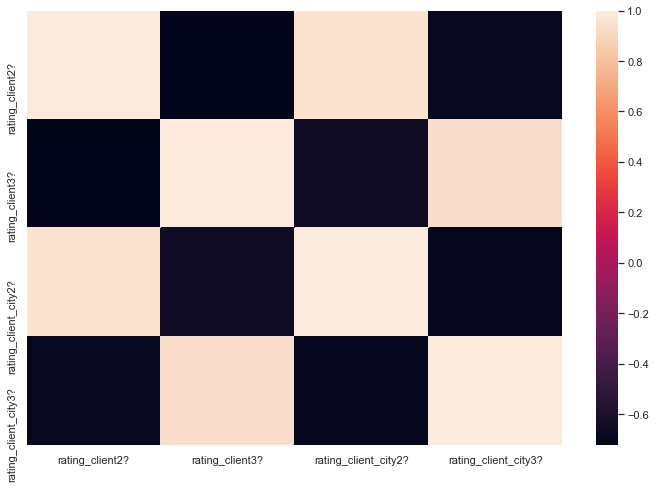

In [41]:
REGION_RATING_CLIENT = pd.get_dummies(credit_df['REGION_RATING_CLIENT'], drop_first = True)
REGION_RATING_CLIENT = REGION_RATING_CLIENT.rename(columns = {2:'rating_client2?', 3: 'rating_client3?'})
REGION_RATING_CLIENT_W_CITY = pd.get_dummies(credit_df['REGION_RATING_CLIENT_W_CITY'], drop_first = True)
REGION_RATING_CLIENT_W_CITY = REGION_RATING_CLIENT_W_CITY.rename(columns = {2:'rating_client_city2?',
                                                                            3: 'rating_client_city3?'})
dummies_region = pd.concat([REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY], axis = 1)
corrMatrixDummy = dummies_region.corr()
sn.heatmap(corrMatrixDummy, annot=False)
plt.show()

These dummy variables are correlated, so we will remove 'REGION_RATING_CLIENT_W_CITY' and only keep 'REGION_RATING_CLIENT'

In [42]:
credit_df = credit_df.drop(['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'], axis = 1)
credit_df = pd.concat([credit_df, REGION_RATING_CLIENT], axis = 1)

##### Examining 'AMT_REQ_CREDIT_BUREAU' features

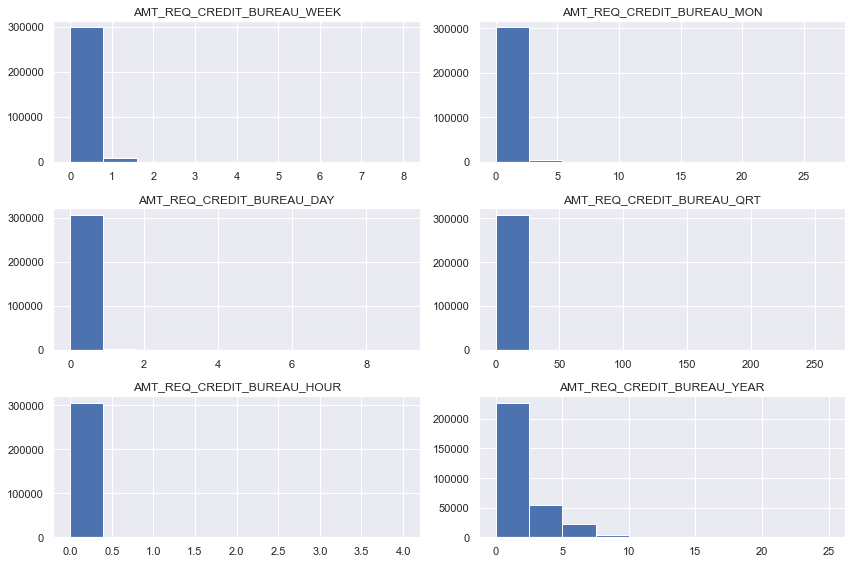

In [43]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_WEEK'])
axs[0, 0].set_title("AMT_REQ_CREDIT_BUREAU_WEEK")
axs[1, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_DAY'])
axs[1, 0].set_title("AMT_REQ_CREDIT_BUREAU_DAY")
axs[2, 0].hist(credit_df['AMT_REQ_CREDIT_BUREAU_HOUR'])
axs[2, 0].set_title("AMT_REQ_CREDIT_BUREAU_HOUR")
axs[0, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_MON'])
axs[0, 1].set_title("AMT_REQ_CREDIT_BUREAU_MON")
axs[1, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_QRT'])
axs[1, 1].set_title("AMT_REQ_CREDIT_BUREAU_QRT")
axs[2, 1].hist(credit_df['AMT_REQ_CREDIT_BUREAU_YEAR'])
axs[2, 1].set_title("AMT_REQ_CREDIT_BUREAU_YEAR")
fig.tight_layout()

This features are highly skewed with values mostly only taking the value 0, so they will be removed. 

In [44]:
credit_df = credit_df.drop(['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                            'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
                            'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1)

#### Seeing which features are not numeric

In [45]:
col_char = list(set(cols) - set(num_cols))
col_char

['NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_REALTY',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START']

#### Examinig which to make binary variables and which to make dummy variables

In [46]:
print(credit_df[col_char])

       NAME_CONTRACT_TYPE  NAME_HOUSING_TYPE    NAME_FAMILY_STATUS  \
0              Cash loans  House / apartment  Single / not married   
1              Cash loans  House / apartment               Married   
2         Revolving loans  House / apartment  Single / not married   
3              Cash loans  House / apartment        Civil marriage   
4              Cash loans  House / apartment  Single / not married   
...                   ...                ...                   ...   
307506         Cash loans       With parents             Separated   
307507         Cash loans  House / apartment                 Widow   
307508         Cash loans  House / apartment             Separated   
307509         Cash loans  House / apartment               Married   
307510         Cash loans  House / apartment               Married   

       FLAG_OWN_CAR            NAME_EDUCATION_TYPE      NAME_INCOME_TYPE  \
0                 N  Secondary / secondary special               Working   
1      

##### Changing 'FLAG_OWN_CAR'

In [47]:
boolian = []
for i in credit_df['FLAG_OWN_CAR']:
    if i == 'N':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['FLAG_OWN_CAR'] = pd.DataFrame(boolian, columns=['FLAG_OWN_CAR'])

##### Changing 'CODE_GENDER' (Male = 0, Female = 1)

In [48]:
boolian = []
for i in credit_df['CODE_GENDER']:
    if i == 'M':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['CODE_GENDER'] = pd.DataFrame(boolian, columns=['CODE_GENDER'])

##### Changing 'FLAG_OWN_REALTY'

In [49]:
boolian = []
for i in credit_df['FLAG_OWN_REALTY']:
    if i == 'N':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['FLAG_OWN_REALTY'] = pd.DataFrame(boolian, columns=['FLAG_OWN_REALTY'])

##### Changing 'NAME_CONTRACT_TYPE' (Cash loans = 0, Revolving loans = 1)

In [50]:
boolian = []
for i in credit_df['NAME_CONTRACT_TYPE']:
    if i == 'Cash loans':
        boolian.append(0)
    else:
        boolian.append(1)

credit_df['NAME_CONTRACT_TYPE'] = pd.DataFrame(boolian, columns=['NAME_CONTRACT_TYPE'])

##### Replacing the remaining NA column with the mode for the non numeric feature

In [51]:
credit_df['NAME_TYPE_SUITE'] = credit_df['NAME_TYPE_SUITE'].fillna(credit_df['NAME_TYPE_SUITE'].mode()[0])

##### Making Dummy Variables out of the rest of the categorical columns and putting it into new data frame

In [52]:
dummy_cols = ['NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 
              'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'WEEKDAY_APPR_PROCESS_START']

count = 0
for i in dummy_cols:
    count = count + 1
    if count == 1:
        dummies_new = pd.get_dummies(credit_df[i], drop_first=True)
    else:
        dummies = pd.get_dummies(credit_df[i], drop_first=True)
        dummies_new = pd.concat([dummies_new, dummies], axis = 1)

##### Removing old categorical features and adding dummy data frame

In [53]:
credit_df = credit_df.drop(dummy_cols, axis = 1)
credit_df = pd.concat([dummies_new, credit_df], axis = 1)

#### Finding features which are not binary and looking at correlation

In [54]:
col_name = []
for i in credit_df.columns:
    if len(credit_df[i].unique()) > 2:
        col_name.append(i)

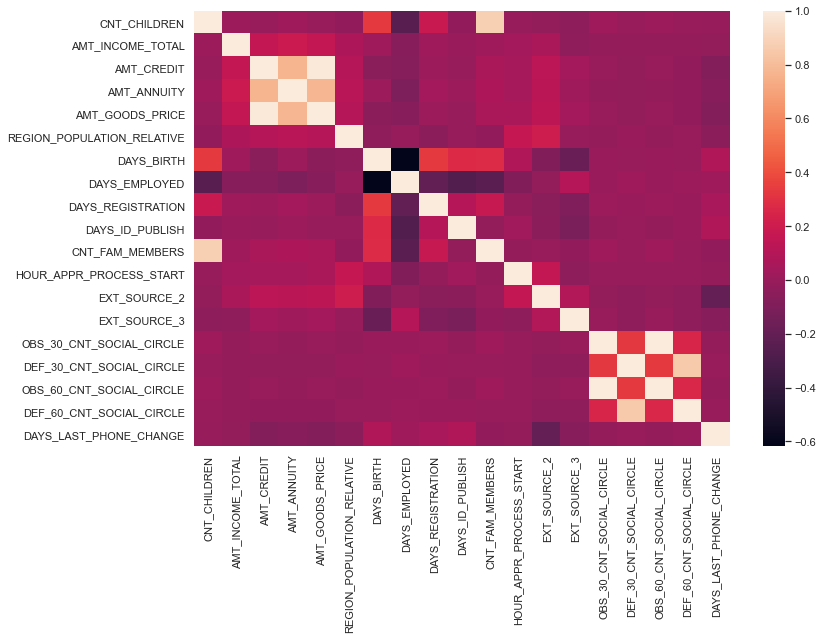

In [55]:
not_binary = credit_df[col_name]
corrMatrix = not_binary.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

After looking at the plot, the correlated features that can be removed are 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', and 'CNT_FAM_MEMBERS'. 

In [56]:
credit_df = credit_df.drop([ 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 
                            'AMT_ANNUITY', 'CNT_FAM_MEMBERS'], axis = 1)

In [57]:
credit_df.shape

(307511, 143)

#### Looking at 'TARGET' spread

In [58]:
data = pd.DataFrame(credit_df['TARGET'])
percentage1 = round((data.TARGET.sum() / data.shape[0]) * 100, 2)
percentage0 = round(100 - percentage1, 2)

print('Percent of 0s:', percentage0)
print('\nPercent of 1s:', percentage1)

Percent of 0s: 91.93

Percent of 1s: 8.07


C:\Users\mzazu\miniconda3\envs\ADS500B\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TARGET', ylabel='count'>

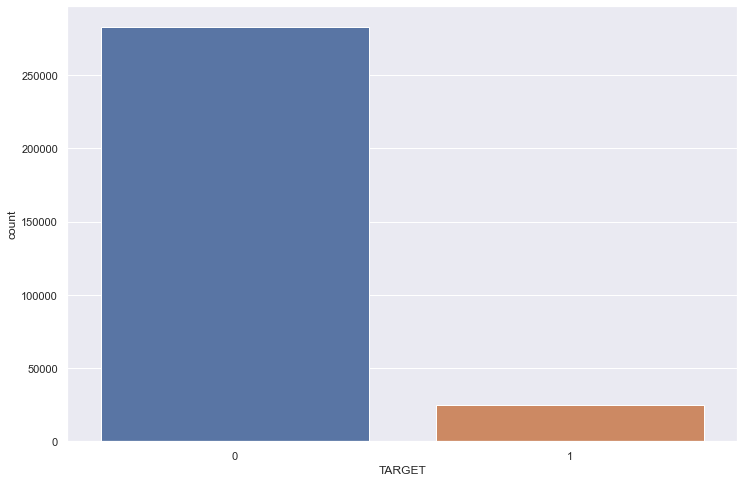

In [59]:
sn.countplot(data['TARGET'])

We can see that this is an imbalanced data set, so during our data splitting we will need to make sure to rebalance the training set. 

### Read final data frame to new CSV file

In [60]:
credit_df.to_csv(os.path.join(DATA_ROOT, 'credit_df.csv'), index=False)

## Models and Evaluation Metrics

In [3]:
credit_df = pd.read_csv(os.path.join(DATA_ROOT, 'credit_df.csv'))

### Modeling

#### Partition the dataset into 60% training, 20% validation, and 20% test

In [4]:
X = credit_df.drop(columns=['TARGET'])
y = credit_df['TARGET']
train_X, rem_X, train_y, rem_y = train_test_split(X, y, train_size=0.6, random_state=42, stratify = y)
valid_X, test_X, valid_y, test_y = train_test_split(rem_X, rem_y, train_size=0.5, random_state=42, stratify = rem_y)

In [5]:
print('Training Set:\n', train_y.value_counts(), '\n', train_y.value_counts(normalize = True))
print('\nValidation Set:\n', valid_y.value_counts(), '\n', valid_y.value_counts(normalize = True))
print('\nTest Set:\n', test_y.value_counts(), '\n', test_y.value_counts(normalize = True))

Training Set:
 0    169611
1     14895
Name: TARGET, dtype: int64 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Validation Set:
 0    56537
1     4965
Name: TARGET, dtype: int64 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Test Set:
 0    56538
1     4965
Name: TARGET, dtype: int64 
 0    0.919272
1    0.080728
Name: TARGET, dtype: float64


##### Resampling training set

In [6]:
# Fixing the class imbalance with tomekLinks and SMOTE
SMOTEtl = SMOTETomek(random_state = 42)

# fit predictor and target variable for training set only
train_X_res, train_y_res = SMOTEtl.fit_resample(train_X, train_y)

print('Original dataset shape:\n', train_y.value_counts())
print('Resampled dataset shape:\n', train_y_res.value_counts())

Original dataset shape:
 0    169611
1     14895
Name: TARGET, dtype: int64
Resampled dataset shape:
 1    166796
0    166796
Name: TARGET, dtype: int64


##### Helper function

In [7]:
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y_res, model.predict(train_X_res))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

#### Logistic regression

In [8]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear', random_state = 1)
logit_reg.fit(train_X_res, train_y_res)
confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.5486)

       Prediction
Actual     0     1
     0 98161 68635
     1 81962 84834
Logistic regression - validation results
Confusion Matrix (Accuracy 0.5796)

       Prediction
Actual     0     1
     0 33071 23466
     1  2388  2577


##### Test Set

In [9]:
logit_pred = logit_reg.predict(test_X)
classificationSummary(test_y, logit_pred)

Confusion Matrix (Accuracy 0.5789)

       Prediction
Actual     0     1
     0 33031 23507
     1  2394  2571


##### Evaluation Metrics

In [10]:
# precision tp / (tp + fp)
precision = precision_score(test_y, logit_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, logit_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, logit_pred)
print('F1 score: %f' % f1)
# ROC AUC
lr_probs = logit_reg.predict_proba(test_X)
lr_probs = lr_probs[:, 1]
auc = roc_auc_score(test_y, lr_probs)
print('ROC AUC: %f' % auc)

Precision: 0.098589
Recall: 0.517825
F1 score: 0.165641
ROC AUC: 0.568793


#### Bagging

In [11]:
bagging = BaggingClassifier( max_samples=0.5, max_features=0.5, random_state = 1)
bagging.fit(train_X_res, train_y_res)
confusionMatrices(bagging, 'Bagged Decision tree')

Bagged Decision tree - training results
Confusion Matrix (Accuracy 0.9759)

       Prediction
Actual      0      1
     0 166685    111
     1   7936 158860
Bagged Decision tree - validation results
Confusion Matrix (Accuracy 0.9124)

       Prediction
Actual     0     1
     0 55992   545
     1  4841   124


###### Test Set

In [12]:
bagging_pred = bagging.predict(test_X)
classificationSummary(test_y, bagging_pred)

Confusion Matrix (Accuracy 0.9130)

       Prediction
Actual     0     1
     0 56033   505
     1  4845   120


##### Evaluation Metrics

In [13]:
# precision tp / (tp + fp)
precision = precision_score(test_y, bagging_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, bagging_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, bagging_pred)
print('F1 score: %f' % f1)
# ROC AUC
bg_probs = bagging.predict_proba(test_X)
bg_probs = bg_probs[:, 1]
auc = roc_auc_score(test_y, bg_probs)
print('ROC AUC: %f' % auc)

Precision: 0.192000
Recall: 0.024169
F1 score: 0.042934
ROC AUC: 0.598841


#### Adaboost

In [14]:
adaboost = AdaBoostClassifier(n_estimators=50,  random_state = 1)
adaboost.fit(train_X_res, train_y_res)
confusionMatrices(adaboost, 'Boosted decision tree')

Boosted decision tree - training results
Confusion Matrix (Accuracy 0.9142)

       Prediction
Actual      0      1
     0 153429  13367
     1  15255 151541
Boosted decision tree - validation results
Confusion Matrix (Accuracy 0.8595)

       Prediction
Actual     0     1
     0 52016  4521
     1  4120   845


##### Test Set

In [15]:
adaboost_pred = adaboost.predict(test_X)
classificationSummary(test_y, adaboost_pred)

Confusion Matrix (Accuracy 0.8609)

       Prediction
Actual     0     1
     0 52112  4426
     1  4127   838


##### Evaluation Metrics

In [16]:
# precision tp / (tp + fp)
precision = precision_score(test_y, adaboost_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, adaboost_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, adaboost_pred)
print('F1 score: %f' % f1)
# ROC AUC
ab_probs = adaboost.predict_proba(test_X)
ab_probs = ab_probs[:, 1]
auc = roc_auc_score(test_y, ab_probs)
print('ROC AUC: %f' % auc)

Precision: 0.159195
Recall: 0.168781
F1 score: 0.163848
ROC AUC: 0.655630


#### Random Forest

In [17]:
RandomForest = RandomForestClassifier(n_estimators=500, random_state=1, max_depth = 6)
RandomForest.fit(train_X_res, train_y_res)
confusionMatrices(RandomForest, 'Random Forest')

Random Forest - training results
Confusion Matrix (Accuracy 0.8906)

       Prediction
Actual      0      1
     0 151105  15691
     1  20812 145984
Random Forest - validation results
Confusion Matrix (Accuracy 0.8489)

       Prediction
Actual     0     1
     0 51139  5398
     1  3895  1070


##### Test Set

In [18]:
RandomForest_pred = RandomForest.predict(test_X)
classificationSummary(test_y, RandomForest_pred)

Confusion Matrix (Accuracy 0.8522)

       Prediction
Actual     0     1
     0 51309  5229
     1  3860  1105


##### Evaluation Metrics

In [19]:
# precision tp / (tp + fp)
precision = precision_score(test_y, RandomForest_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, RandomForest_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, RandomForest_pred)
print('F1 score: %f' % f1)
# ROC AUC
rf_probs = RandomForest.predict_proba(test_X)
rf_probs = rf_probs[:, 1]
auc = roc_auc_score(test_y, rf_probs)
print('ROC AUC: %f' % auc)

Precision: 0.174455
Recall: 0.222558
F1 score: 0.195593
ROC AUC: 0.668388


#### Linear discriminant analysis

In [20]:
lda_Model = LinearDiscriminantAnalysis()
lda_Model.fit(train_X_res, train_y_res)
confusionMatrices(lda_Model, 'Linear discriminant analysis')

Linear discriminant analysis - training results
Confusion Matrix (Accuracy 0.9421)

       Prediction
Actual      0      1
     0 165581   1215
     1  18096 148700
Linear discriminant analysis - validation results
Confusion Matrix (Accuracy 0.9144)

       Prediction
Actual     0     1
     0 56122   415
     1  4850   115


##### Test Set

In [21]:
lda_Model_pred = lda_Model.predict(test_X)
classificationSummary(test_y, lda_Model_pred)

Confusion Matrix (Accuracy 0.9147)

       Prediction
Actual     0     1
     0 56149   389
     1  4856   109


##### Evaluation Metrics

In [22]:
# precision tp / (tp + fp)
precision = precision_score(test_y, lda_Model_pred )
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, lda_Model_pred )
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, lda_Model_pred )
print('F1 score: %f' % f1)
# ROC AUC
lda_probs = lda_Model.predict_proba(test_X)
lda_probs = lda_probs[:, 1]
auc = roc_auc_score(test_y, lda_probs)
print('ROC AUC: %f' % auc)

Precision: 0.218876
Recall: 0.021954
F1 score: 0.039905
ROC AUC: 0.639864


#### Neural Network

In [23]:
neuralNet = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', max_iter=2000, 
                          random_state=1)
neuralNet.fit(train_X_res, train_y_res)
confusionMatrices(neuralNet, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.5389)

       Prediction
Actual      0      1
     0  63794 103002
     1  50827 115969
Neural Network - validation results
Confusion Matrix (Accuracy 0.4064)

       Prediction
Actual     0     1
     0 21588 34949
     1  1556  3409


##### Test Set

In [24]:
neuralNet_pred = neuralNet.predict(test_X)
classificationSummary(test_y, neuralNet_pred )

Confusion Matrix (Accuracy 0.4112)

       Prediction
Actual     0     1
     0 21822 34716
     1  1499  3466


##### Evaluation Metrics

In [25]:
# precision tp / (tp + fp)
precision = precision_score(test_y, neuralNet_pred )
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, neuralNet_pred )
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, neuralNet_pred )
print('F1 score: %f' % f1)
# ROC AUC
nn_probs = neuralNet.predict_proba(test_X)
nn_probs = nn_probs[:, 1]
auc = roc_auc_score(test_y, nn_probs)
print('ROC AUC: %f' % auc)

Precision: 0.090776
Recall: 0.698087
F1 score: 0.160660
ROC AUC: 0.542171


### Final Model Selection: Random Forest

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.668


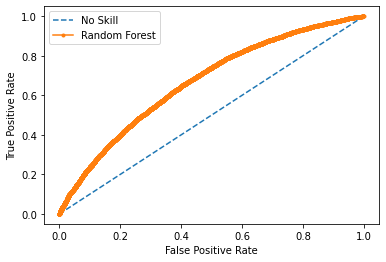

In [26]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
rf_auc = roc_auc_score(test_y, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Lift Charts

<AxesSubplot:title={'center':'Bagging'}, xlabel='# records', ylabel='# cumulative gains'>

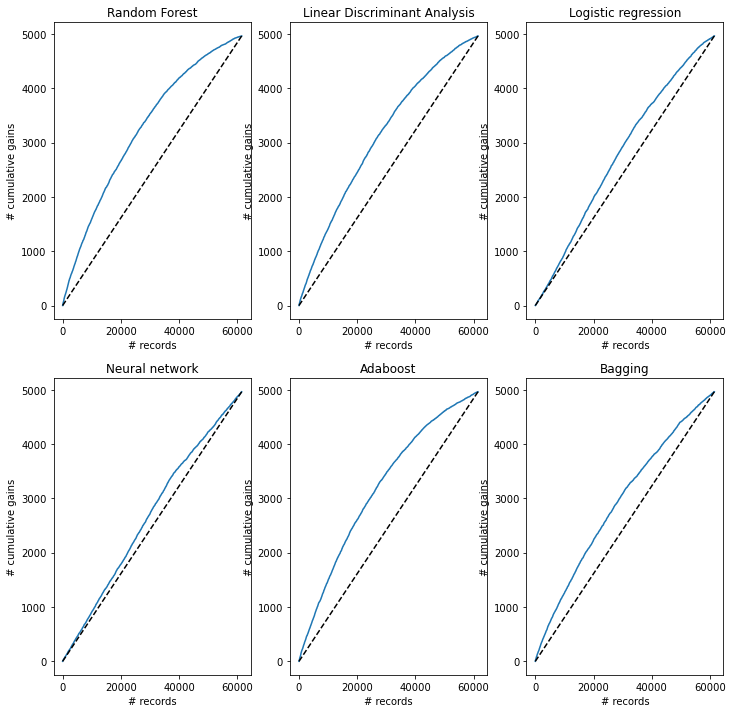

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

def modelGainsChart(model, title, ax=None):
    result = pd.DataFrame({
        'actual': test_y,
        'prob': model.predict_proba(test_X)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    ax = gainsChart(result.actual, ax=ax)
    ax.set_title(title)
    return ax

modelGainsChart(RandomForest, 'Random Forest', axes[0,0])
modelGainsChart(lda_Model, 'Linear Discriminant Analysis', axes[0,1])
modelGainsChart(logit_reg, 'Logistic regression', axes[0,2])
modelGainsChart(neuralNet, 'Neural network', axes[1,0])
modelGainsChart(adaboost, 'Adaboost', axes[1,1])
modelGainsChart(bagging, 'Bagging', axes[1,2])

#### Table of ML Metrics

In [32]:
table = {'Models':["Logistic Regression",
                   "Bagging","Ada boost",
                   "Random Forest","Linear discriminant analysis",
                   "Neural Network"],
         'Accuracy':[accuracy_score(test_y, logit_pred),
                     accuracy_score(test_y, bagging_pred),
                     accuracy_score(test_y, adaboost_pred),
                     accuracy_score(test_y, RandomForest_pred),
                     accuracy_score(test_y, lda_Model_pred),
                     accuracy_score(test_y, neuralNet_pred)],
         
         'Precision':[precision_score(test_y, logit_pred),
                      precision_score(test_y, bagging_pred),
                      precision_score(test_y, adaboost_pred),
                      precision_score(test_y, RandomForest_pred),
                      precision_score(test_y, lda_Model_pred),
                      precision_score(test_y, neuralNet_pred) ],
         
         "Recall":[recall_score(test_y, logit_pred),
                   recall_score(test_y, bagging_pred),
                   recall_score(test_y, adaboost_pred),
                   recall_score(test_y, RandomForest_pred),
                   recall_score(test_y,  lda_Model_pred),
                   recall_score(test_y,neuralNet_pred)],
         
         "F1_Score":[f1_score(test_y, logit_pred),
                     f1_score(test_y, bagging_pred),
                     f1_score(test_y, adaboost_pred),
                     f1_score(test_y, RandomForest_pred),
                     f1_score(test_y,  lda_Model_pred),
                     f1_score(test_y,neuralNet_pred)],
                  
         "ROC AUC":[roc_auc_score(test_y, lr_probs),
                    roc_auc_score(test_y, bg_probs),
                    roc_auc_score(test_y, ab_probs),
                    roc_auc_score(test_y, rf_probs),
                    roc_auc_score(test_y,  lda_probs),
                    roc_auc_score(test_y,  nn_probs)]
        }
         
         
                              
table_report = pd.DataFrame(table)
 
# print the data 
table_report

,Models,Accuracy,Precision,Recall,F1_Score,ROC AUC
0,Logistic Regression,0.578866,0.098589,0.517825,0.165641,0.568793
1,Bagging,0.913012,0.192000,0.024169,0.042934,0.598841
2,Ada boost,0.860934,0.159195,0.168781,0.163848,0.655630
3,Random Forest,0.852219,0.174455,0.222558,0.195593,0.668388
4,Linear discriminant analysis,0.914720,0.218876,0.021954,0.039905,0.639864
5,Neural Network,0.411167,0.090776,0.698087,0.160660,0.542171
